In [11]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
import h5py
import numpy as np
import mahotas as mh

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from threed import ThreeD

In [13]:
DATA = '/home/d/data/toufiq/segmentation.h5'


In [35]:
with h5py.File(DATA,'r') as f:
    vol = f[f.keys()[0]][0:10,0:300,0:300]

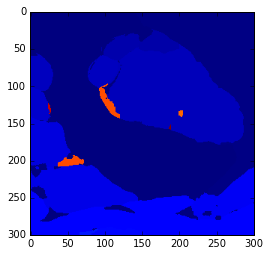

In [36]:
imshow(vol[0])

In [16]:
LABELID = 32

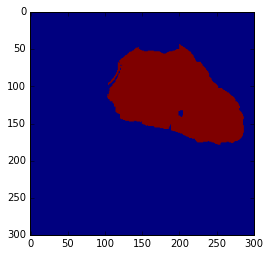

In [48]:
# 1. thresholding
thresholded = ThreeD.threshold(vol, LABELID)
imshow(thresholded[0])

thresholded = np.repeat(thresholded, 10, axis=0)

(300, 100, 300)
(304, 104, 304)


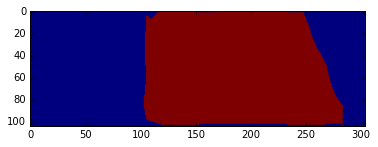

In [71]:
# 2. smoothing
thresholded_swapped = np.swapaxes(thresholded, 0, 1)
print thresholded_swapped.shape
thresholded_padded = np.pad(thresholded_swapped, 2, mode='constant')
print thresholded_padded.shape
smoothed = ThreeD.smoothen(thresholded_padded)
imshow(smoothed[100])

In [72]:
# 3. marching cubes
ThreeD.create_mesh(smoothed, '/tmp/out.stl')